In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# 회귀분석
from statsmodels.formula.api import ols
# qqplot, 회귀분석의 상수항 추가
from statsmodels.api import qqplot, add_constant
# 선형 모델 formula(y ~ X1 + X2 + ...)
import statsmodels.formula.api as smf
# 다중공선성 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor
# 선형회귀모형
from sklearn.linear_model import LinearRegression
# 변수 선택법(후진제거법)
from sklearn.feature_selection import RFE
# Scale 변환->표준화 회귀계수 산출
from sklearn.preprocessing import StandardScaler
# 평가함수
from statsmodels.tools.eval_measures import rmse
import matplotlib

In [2]:
# 패키지 불러오기
from sklearn.linear_model import Ridge, Lasso, ElasticNet

# 다중 회귀분석_규제화 - 연습

In [104]:
df_raw = pd.read_csv("C:/Users/USER/Desktop/포스코 청년 아카데미_B4_김민경/데이터 분석1/분석자료/체질검사.CSV")
df_raw.head()


,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
0,35.2,46,363.15,72.25,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4
1,11.8,27,168.00,71.25,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8
2,22.2,69,177.75,68.50,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8
3,10.6,57,147.75,65.75,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9
4,47.5,51,219.00,64.00,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4


In [105]:
# 목표변수, 설명변수 데이터 지정
df_raw_y = df_raw['FAT']
df_raw_x = df_raw.drop('FAT', axis = 1, inplace = False)

In [106]:
# 설명력 결과 저장
train_score = []
# 알파 : 규제화강도
para_alpha = [n_alpha * 0.1 for n_alpha in range(1,11)]

for v_alpha in para_alpha:
    ridge = Ridge(random_state = 1234, alpha = v_alpha)
    ridge.fit(df_raw_x, df_raw_y)
    train_score.append(ridge.score(df_raw_x, df_raw_y))

# 결과저장
df_score_alpha = pd.DataFrame()
df_score_alpha['Alpha'] = para_alpha
df_score_alpha['TrainScore'] = train_score
df_score_alpha

,Alpha,TrainScore
0,0.1,0.749050
1,0.2,0.749050
2,0.3,0.749050
3,0.4,0.749050
4,0.5,0.749049
5,0.6,0.749049
6,0.7,0.749049
7,0.8,0.749049
8,0.9,0.749048
9,1.0,0.749048


In [107]:
ridge_final = Ridge(alpha=0.1, random_state=1234)
result = ridge_final.fit(df_raw_x, df_raw_y)

df_ridge = pd.DataFrame()
df_ridge['variable'] = df_raw_x.columns
df_ridge['Coef'] = pd.DataFrame(result.coef_)
df_ridge


,variable,Coef
0,AGE,0.062028
1,WEIGHT,-0.088485
2,HEIGHT,-0.069638
3,NECK,-0.470754
4,CHEST,-0.023830
5,ABDOMEN,0.954786
6,HIP,-0.207502
7,THIGH,0.236117
8,KNEE,0.015231
9,ANKLE,0.173703


In [108]:
# 절편값 확인
print(result.intercept_)

-18.20613649625604


<AxesSubplot:>

C:\Users\USER\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\USER\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


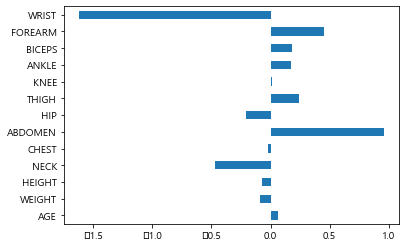

In [109]:
# 변수의 중요도 확인
df_ridge_coef = pd.DataFrame({'Coef': result.coef_ }, index = df_raw_x.columns)
df_ridge_coef.plot.barh(y = 'Coef', legend = False)

In [110]:
train_score = []
para_alpha = [n_alpha * 0.1 for n_alpha in range(1,11)]

for v_alpha in para_alpha:
    lasso = Lasso(random_state = 1234, alpha = v_alpha)
    lasso.fit(df_raw_x, df_raw_y)
    train_score.append(lasso.score(df_raw_x, df_raw_y))
    
df_score_alpha = pd.DataFrame()
df_score_alpha['Alpha'] = para_alpha
df_score_alpha['TrainScore'] = train_score
df_score_alpha

,Alpha,TrainScore
0,0.1,0.747998
1,0.2,0.745241
2,0.3,0.741448
3,0.4,0.736137
4,0.5,0.730741
5,0.6,0.727639
6,0.7,0.724263
7,0.8,0.722143
8,0.9,0.721207
9,1.0,0.720397


In [111]:
lasso_final = Lasso(alpha=0.1, random_state=1234)
result = lasso_final.fit(df_raw_x, df_raw_y)

df_lasso = pd.DataFrame()
df_lasso['variable'] = df_raw_x.columns
df_lasso['Coef'] = pd.DataFrame(result.coef_)
df_lasso


,variable,Coef
0,AGE,0.051814
1,WEIGHT,-0.098224
2,HEIGHT,-0.066683
3,NECK,-0.437469
4,CHEST,-0.001287
5,ABDOMEN,0.940655
6,HIP,-0.164923
7,THIGH,0.221392
8,KNEE,0.000000
9,ANKLE,0.076146


<AxesSubplot:>

C:\Users\USER\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\USER\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


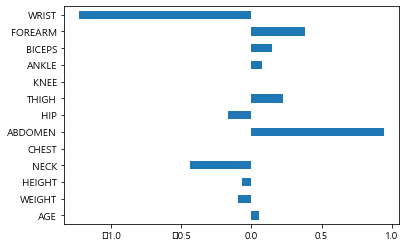

In [112]:
df_lasso_coef = pd.DataFrame({'Coef': result.coef_ }, index = df_raw_x.columns)
df_lasso_coef.plot.barh(y = 'Coef', legend = False)

In [113]:
train_score = []
para_alpha = [n_alpha * 0.1 for n_alpha in range(1,11)]

for v_alpha in para_alpha:
    elastic = ElasticNet(random_state = 1234, alpha = v_alpha)
    elastic.fit(df_raw_x, df_raw_y)
    train_score.append(elastic.score(df_raw_x, df_raw_y))
    
df_score_alpha = pd.DataFrame()
df_score_alpha['Alpha'] = para_alpha
df_score_alpha['TrainScore'] = train_score
df_score_alpha

,Alpha,TrainScore
0,0.1,0.748188
1,0.2,0.746369
2,0.3,0.744264
3,0.4,0.742184
4,0.5,0.739976
5,0.6,0.737685
6,0.7,0.735334
7,0.8,0.732940
8,0.9,0.730512
9,1.0,0.728347


In [114]:
elastic_final = ElasticNet(alpha=0.1, random_state=1234)
result = elastic_final.fit(df_raw_x, df_raw_y)

df_elastic = pd.DataFrame()
df_elastic['variable'] = df_raw_x.columns
df_elastic['Coef'] = pd.DataFrame(result.coef_)
df_elastic


,variable,Coef
0,AGE,0.052387
1,WEIGHT,-0.097031
2,HEIGHT,-0.072548
3,NECK,-0.464105
4,CHEST,-0.008892
5,ABDOMEN,0.947577
6,HIP,-0.180995
7,THIGH,0.230140
8,KNEE,0.000000
9,ANKLE,0.099379


<AxesSubplot:>

C:\Users\USER\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\USER\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


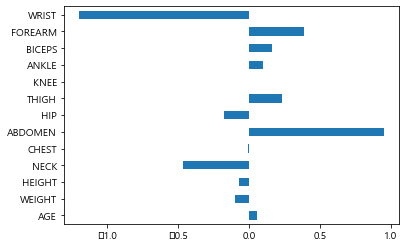

In [115]:
df_elastic_coef = pd.DataFrame({'Coef': result.coef_ }, index = df_raw_x.columns)
df_elastic_coef.plot.barh(y = 'Coef', legend = False)

# 다중 회귀분석_규제화 - 실습

In [32]:
df_raw = pd.read_csv("C:/Users/USER/Desktop/포스코 청년 아카데미_B4_김민경/데이터 분석1/분석자료/DIABETES.CSV")
df_raw.head()


,Y,AGE,GENDER,BMI,BP,CHOLESTEROL,LDL,HDL,TCH,LTG,GLUCOSE
0,151,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87
1,75,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69
2,141,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85
3,206,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89
4,135,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80


In [33]:
# 목표변수, 설명변수 데이터 지정
df_raw_y = df_raw['Y']
df_raw_x = df_raw.drop('Y', axis = 1, inplace = False)

In [34]:
# 설명력 결과 저장
train_score = []
# 알파 : 규제화강도
para_alpha = [n_alpha * 0.1 for n_alpha in range(1,11)]

for v_alpha in para_alpha:
    ridge = Ridge(random_state = 1234, alpha = v_alpha)
    ridge.fit(df_raw_x, df_raw_y)
    train_score.append(ridge.score(df_raw_x, df_raw_y))

# 결과저장
df_score_alpha = pd.DataFrame()
df_score_alpha['Alpha'] = para_alpha
df_score_alpha['TrainScore'] = train_score
df_score_alpha

,Alpha,TrainScore
0,0.1,0.517747
1,0.2,0.517742
2,0.3,0.517735
3,0.4,0.517725
4,0.5,0.517713
5,0.6,0.517698
6,0.7,0.517681
7,0.8,0.517662
8,0.9,0.517641
9,1.0,0.517618


In [35]:
ridge_final = Ridge(alpha=0.1, random_state=1234)
result = ridge_final.fit(df_raw_x, df_raw_y)

df_ridge = pd.DataFrame()
df_ridge['variable'] = df_raw_x.columns
df_ridge['Coef'] = pd.DataFrame(result.coef_)
df_ridge

,variable,Coef
0,AGE,-0.035978
1,GENDER,-22.834211
2,BMI,5.606966
3,BP,1.117056
4,CHOLESTEROL,-1.071163
5,LDL,0.729092
6,HDL,0.351145
7,TCH,6.503749
8,LTG,67.912885
9,GLUCOSE,0.280944


In [36]:
# 절편값 확인
print(result.intercept_)

-332.5782250281351


<AxesSubplot:>

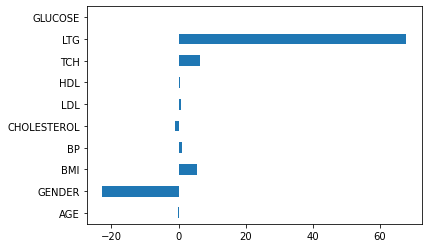

In [37]:
# 변수의 중요도 확인
df_ridge_coef = pd.DataFrame({'Coef': result.coef_ }, index = df_raw_x.columns)
df_ridge_coef.plot.barh(y = 'Coef', legend = False)

In [38]:
train_score = []
para_alpha = [n_alpha * 0.1 for n_alpha in range(1,11)]

for v_alpha in para_alpha:
    lasso = Lasso(random_state = 1234, alpha = v_alpha)
    lasso.fit(df_raw_x, df_raw_y)
    train_score.append(lasso.score(df_raw_x, df_raw_y))
    
df_score_alpha = pd.DataFrame()
df_score_alpha['Alpha'] = para_alpha
df_score_alpha['TrainScore'] = train_score
df_score_alpha

,Alpha,TrainScore
0,0.1,0.517648
1,0.2,0.517375
2,0.3,0.516961
3,0.4,0.516348
4,0.5,0.515561
5,0.6,0.514598
6,0.7,0.513855
7,0.8,0.512663
8,0.9,0.512027
9,1.0,0.510684


In [39]:
lasso_final = Lasso(alpha=0.1, random_state=1234)
result = lasso_final.fit(df_raw_x, df_raw_y)

df_lasso = pd.DataFrame()
df_lasso['variable'] = df_raw_x.columns
df_lasso['Coef'] = pd.DataFrame(result.coef_)
df_lasso

,variable,Coef
0,AGE,-0.034222
1,GENDER,-22.318852
2,BMI,5.628241
3,BP,1.113876
4,CHOLESTEROL,-0.934757
5,LDL,0.613370
6,HDL,0.176172
7,TCH,5.754523
8,LTG,64.326888
9,GLUCOSE,0.285376


<AxesSubplot:>

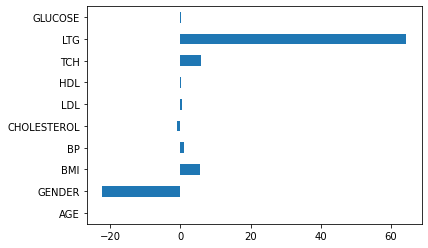

In [40]:
df_lasso_coef = pd.DataFrame({'Coef': result.coef_ }, index = df_raw_x.columns)
df_lasso_coef.plot.barh(y = 'Coef', legend = False)

In [41]:
train_score = []
para_alpha = [n_alpha * 0.1 for n_alpha in range(1,11)]

for v_alpha in para_alpha:
    elastic = ElasticNet(random_state = 1234, alpha = v_alpha)
    elastic.fit(df_raw_x, df_raw_y)
    train_score.append(elastic.score(df_raw_x, df_raw_y))
    
df_score_alpha = pd.DataFrame()
df_score_alpha['Alpha'] = para_alpha
df_score_alpha['TrainScore'] = train_score
df_score_alpha

,Alpha,TrainScore
0,0.1,0.507664
1,0.2,0.501887
2,0.3,0.498299
3,0.4,0.495725
4,0.5,0.493741
5,0.6,0.492147
6,0.7,0.490828
7,0.8,0.489714
8,0.9,0.488758
9,1.0,0.487926


In [42]:
elastic_final = ElasticNet(alpha=0.1, random_state=1234)
result = elastic_final.fit(df_raw_x, df_raw_y)

df_elastic = pd.DataFrame()
df_elastic['variable'] = df_raw_x.columns
df_elastic['Coef'] = pd.DataFrame(result.coef_)
df_elastic

,variable,Coef
0,AGE,-0.016041
1,GENDER,-18.035466
2,BMI,5.949904
3,BP,1.115480
4,CHOLESTEROL,0.424041
5,LDL,-0.637493
6,HDL,-1.299269
7,TCH,3.428739
8,LTG,23.457901
9,GLUCOSE,0.338639


<AxesSubplot:>

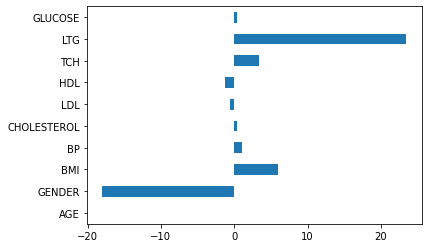

In [43]:
df_elastic_coef = pd.DataFrame({'Coef': result.coef_ }, index = df_raw_x.columns)
df_elastic_coef.plot.barh(y = 'Coef', legend = False)

# 의사결정나무- 연습

In [3]:
#from sklearn.tree import export_graphviz  환경 설정하기 어려움
#import graphviz

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
# 나무 구조 시각화  
from sklearn.tree import plot_tree

In [4]:
matplotlib.rc('font', family = 'Malgun Gothic') 

In [5]:
df_raw = pd.read_csv("C:/Users/USER/Desktop/포스코 청년 아카데미_B4_김민경/데이터 분석1/분석자료/체질검사.CSV")
df_raw.head()

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
0,35.2,46,363.15,72.25,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4
1,11.8,27,168.00,71.25,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8
2,22.2,69,177.75,68.50,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8
3,10.6,57,147.75,65.75,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9
4,47.5,51,219.00,64.00,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4


In [6]:
# 목표변수, 설명변수 데이터 지정
df_raw_y = df_raw['FAT']
df_raw_x = df_raw.drop('FAT', axis = 1, inplace = False)

In [7]:
# train, test 분리
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y,
                                                               test_size= 0.3, random_state=1234)
print('train data X size : {}'.format(df_train_x.shape))
print('train data Y size : {}'.format(df_train_y.shape))
print('test data X size : {}'.format(df_test_x.shape))
print('test data Y size : {}'.format(df_test_y.shape))

train data X size : (176, 13)
train data Y size : (176,)
test data X size : (76, 13)
test data Y size : (76,)


In [8]:
tree_uncustomized = DecisionTreeRegressor(random_state = 1234)
tree_uncustomized.fit(df_train_x, df_train_y)

# train 데이터 설명력
print('Score on training set : {:.3f}'.format(tree_uncustomized.score(df_train_x, df_train_y)))
# test 데이터 설명력
print('Score on test set : {:.3f}'.format(tree_uncustomized.score(df_test_x, df_test_y)))

Score on training set : 1.000
Score on test set : 0.345


In [32]:
tree_uncustomized

DecisionTreeRegressor(random_state=1234)

In [33]:
train_score =[]
test_score=[]

para_leaf = [n_leaf * 1 for n_leaf in range(1,20)]

for v_min_samples_leaf in para_leaf:
    tree = DecisionTreeRegressor(random_state = 1234
                                , min_samples_leaf = v_min_samples_leaf)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))
    
df_score_leaf = pd.DataFrame()
df_score_leaf['MinSamplesLeaf'] = para_leaf
df_score_leaf['TrainScore'] = train_score
df_score_leaf['TestScore'] = test_score

In [34]:
# 모델 설명력 확인
df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,1,1.000,0.345
1,2,0.970,0.374
2,3,0.928,0.445
3,4,0.902,0.447
4,5,0.868,0.451
5,6,0.851,0.447
6,7,0.843,0.465
7,8,0.830,0.536
8,9,0.802,0.477
9,10,0.793,0.505


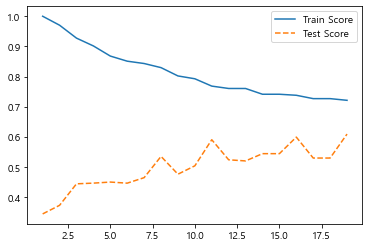

In [35]:
# 모델 설몀력 그래프 확인
plt.plot(para_leaf, train_score, linestyle = '-', label = 'Train Score')
plt.plot(para_leaf, test_score, linestyle = '--', label = 'Test Score')
plt.legend()

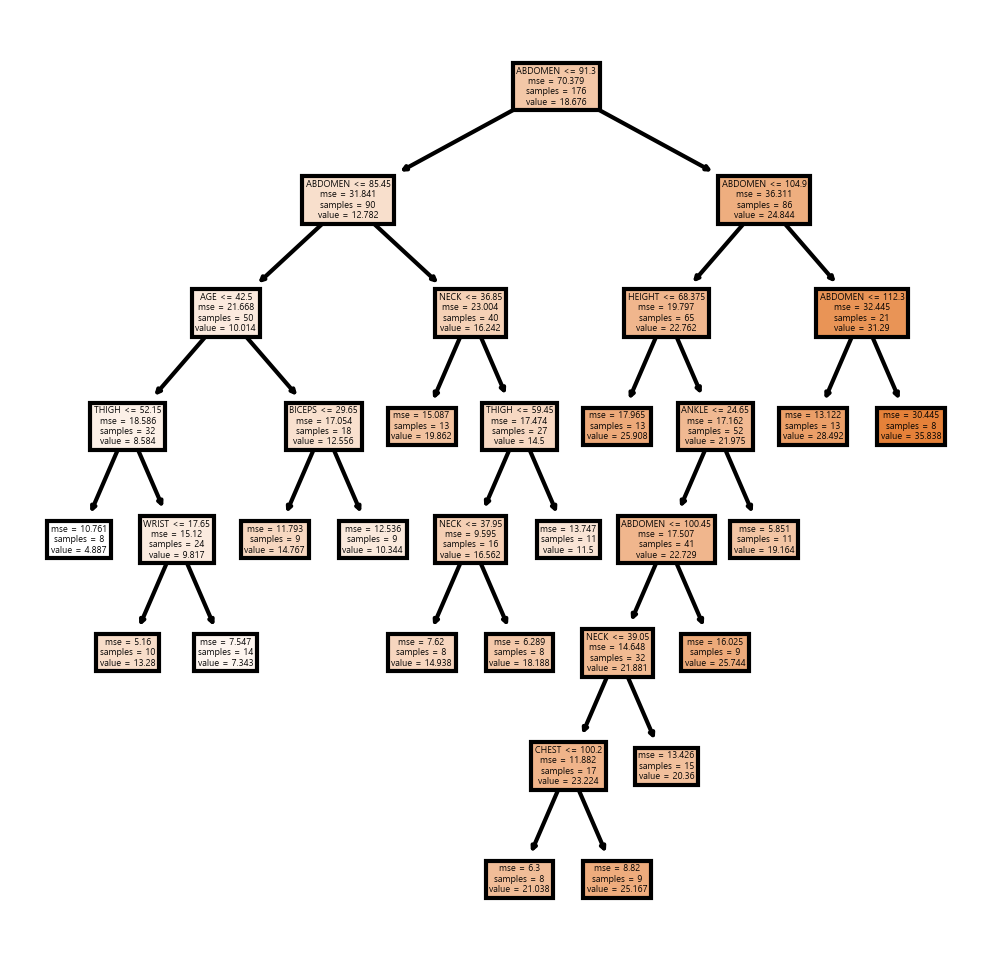

In [36]:
# 변수명 저장
v_feature_name = df_train_x.columns
# 노드의 최소 자료 수=8 모델
tree_graph = DecisionTreeRegressor(random_state=1234,  min_samples_leaf=8 )
tree_graph.fit(df_train_x, df_train_y)
v_feature_name = df_train_x.columns
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4, 4), dpi=300)
plot_tree(tree_graph, feature_names = v_feature_name, filled = True);

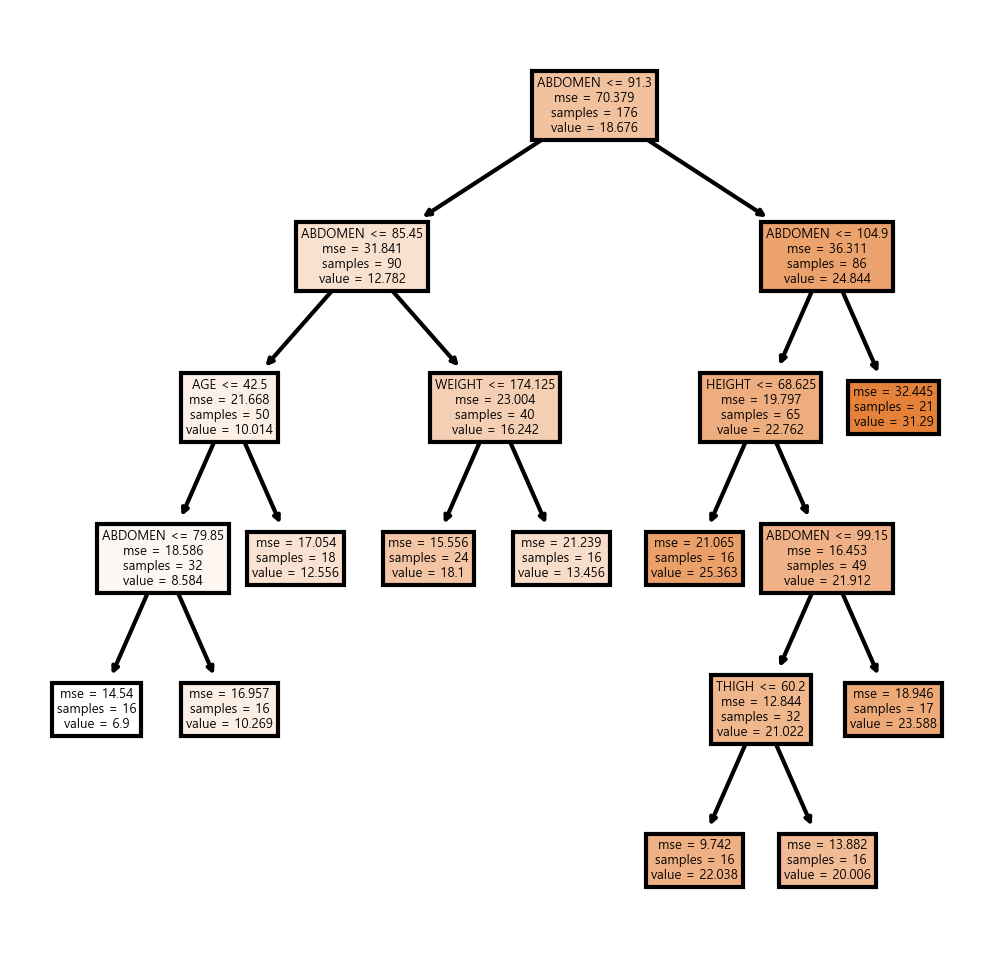

In [37]:
# 노드의 최소 자료 수=16 모델
tree_graph = DecisionTreeRegressor(random_state=1234,  min_samples_leaf=16 )
tree_graph.fit(df_train_x, df_train_y)
v_feature_name = df_train_x.columns
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4, 4), dpi=300)
plot_tree(tree_graph, feature_names = v_feature_name, filled = True);

In [50]:
train_score = [] 
test_score = []
# min_samples_split: 분리 노드의 최소 자료 수 
para_split = [n_split * 2 for n_split in range(2, 20)]

for v_min_samples_split in para_split:
    tree = DecisionTreeRegressor(random_state=1234, min_samples_leaf=8
                                 , min_samples_split=v_min_samples_split )
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))
# 결과 저장
df_score_split = pd.DataFrame()
df_score_split["MinSamplesSplit"] = para_split
df_score_split["TrainScore"] = train_score
df_score_split["TestScore"] = test_score
df_score_split.round(3)

,MinSamplesSplit,TrainScore,TestScore
0,4,0.830,0.536
1,6,0.830,0.536
2,8,0.830,0.536
3,10,0.830,0.536
4,12,0.830,0.536
5,14,0.830,0.536
6,16,0.830,0.536
7,18,0.821,0.557
8,20,0.813,0.581
9,22,0.792,0.567


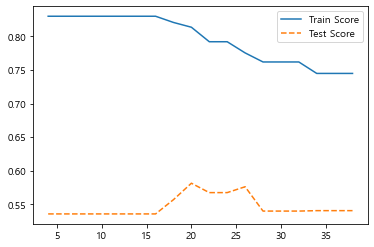

In [51]:
# 모델 설명력 그래프 확인
plt.plot(para_split, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_split, test_score, linestyle = "--", label = "Test Score")
plt.legend()

# 성능변화를 고려하여 20, 26 선택

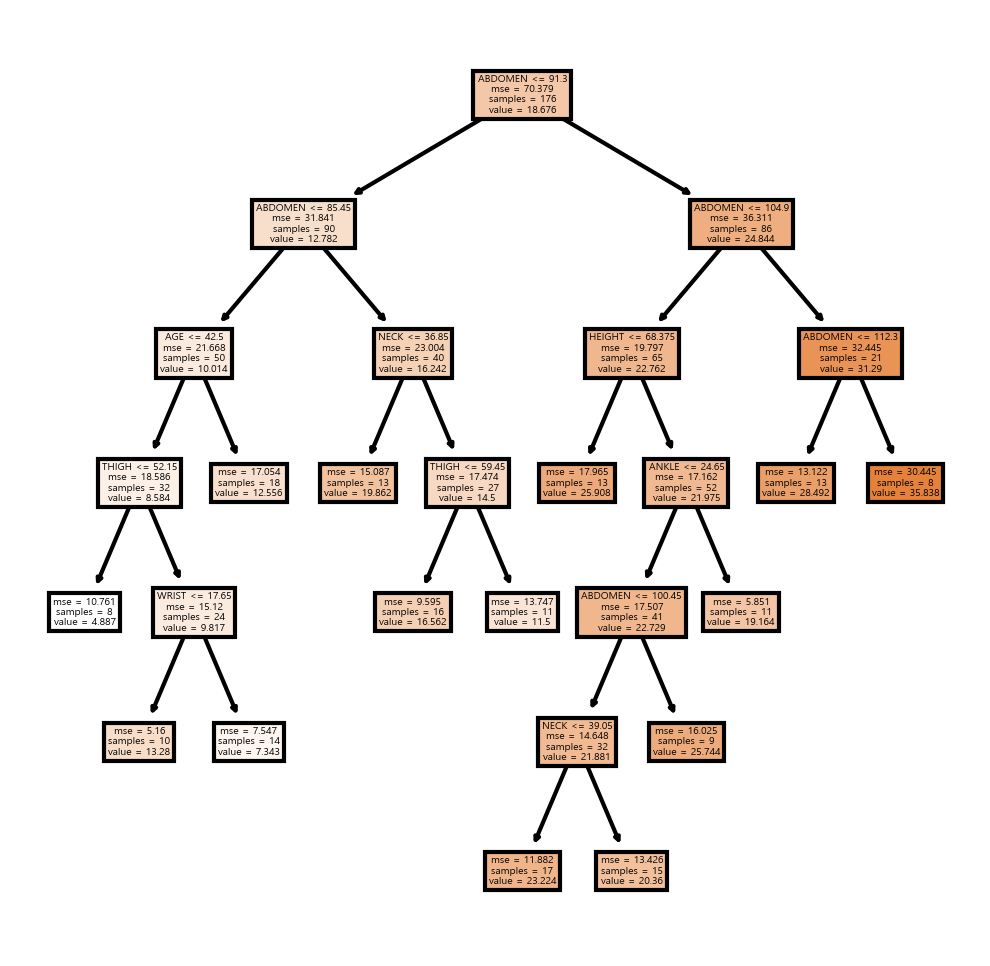

In [52]:
# 분리노드의 최소자료수 = 20 모델
tree_graph = DecisionTreeRegressor(random_state=1234, min_samples_leaf=8, min_samples_split=20 )
tree_graph.fit(df_train_x, df_train_y)
v_feature_name = df_train_x.columns
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4, 4), dpi=300)
plot_tree(tree_graph, feature_names = v_feature_name, filled = True);

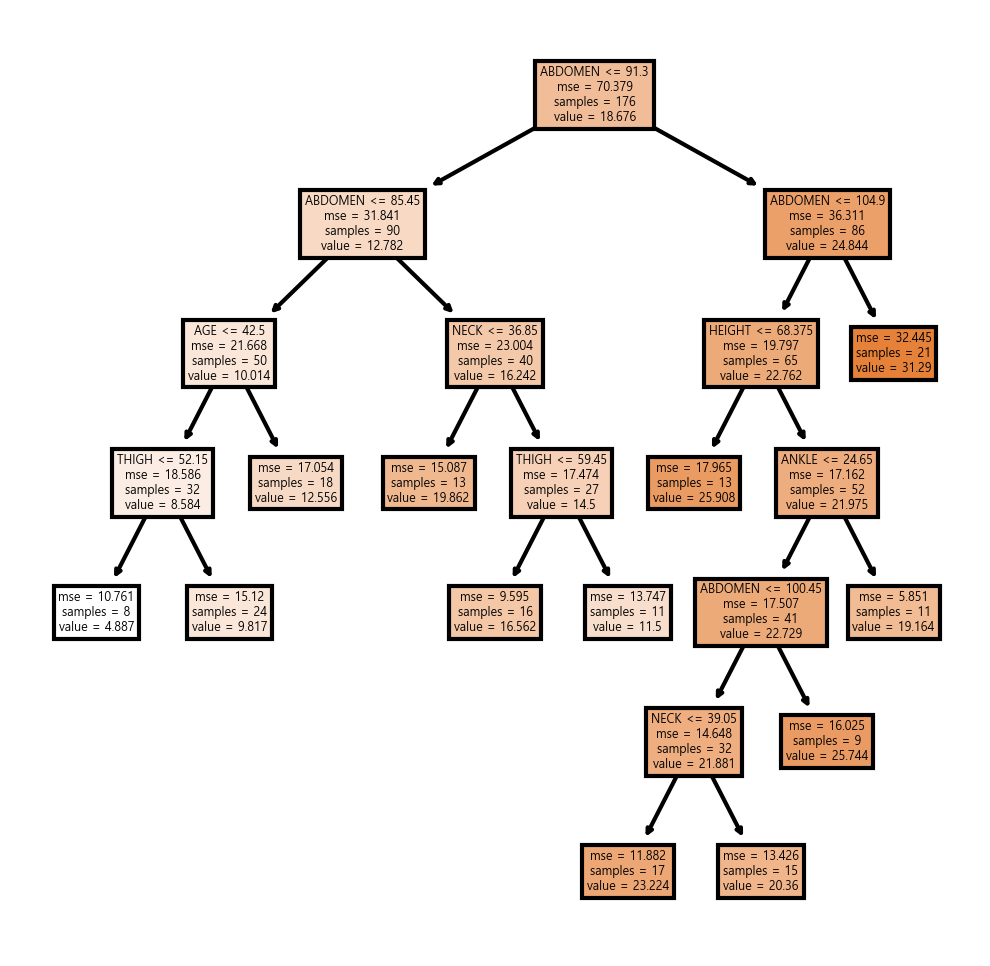

In [53]:
# 분리노드의 최소자료수 = 26 모델
tree_graph = DecisionTreeRegressor(random_state=1234, min_samples_leaf=8, min_samples_split=26 )
tree_graph.fit(df_train_x, df_train_y)
v_feature_name = df_train_x.columns
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4, 4), dpi=300)
plot_tree(tree_graph, feature_names = v_feature_name, filled = True);

In [54]:
train_score = []
test_score = []
# max_depth: 최대 깊이 변경
para_depth = [depth for depth in range(1, 11)]

for v_max_depth in para_depth:
    tree = DecisionTreeRegressor(random_state=1234, min_samples_leaf=8, min_samples_split=20
                                  , max_depth = v_max_depth)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_score_depth = pd.DataFrame()
df_score_depth["Depth"] = para_depth
df_score_depth["TrainScore"] = train_score
df_score_depth["TestScore"] = test_score
df_score_depth.round(3)

,Depth,TrainScore,TestScore
0,1,0.517,0.333
1,2,0.679,0.569
2,3,0.749,0.538
3,4,0.783,0.570
4,5,0.808,0.581
5,6,0.813,0.581
6,7,0.813,0.581
7,8,0.813,0.581
8,9,0.813,0.581
9,10,0.813,0.581


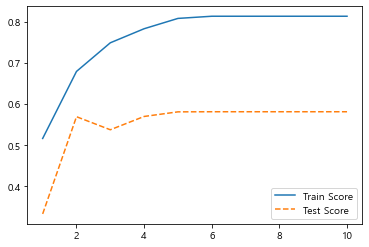

In [55]:
# 모델 설명력 그래프 확인
plt.plot(para_depth, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_depth, test_score, linestyle = "--", label = "Test Score")
plt.legend()


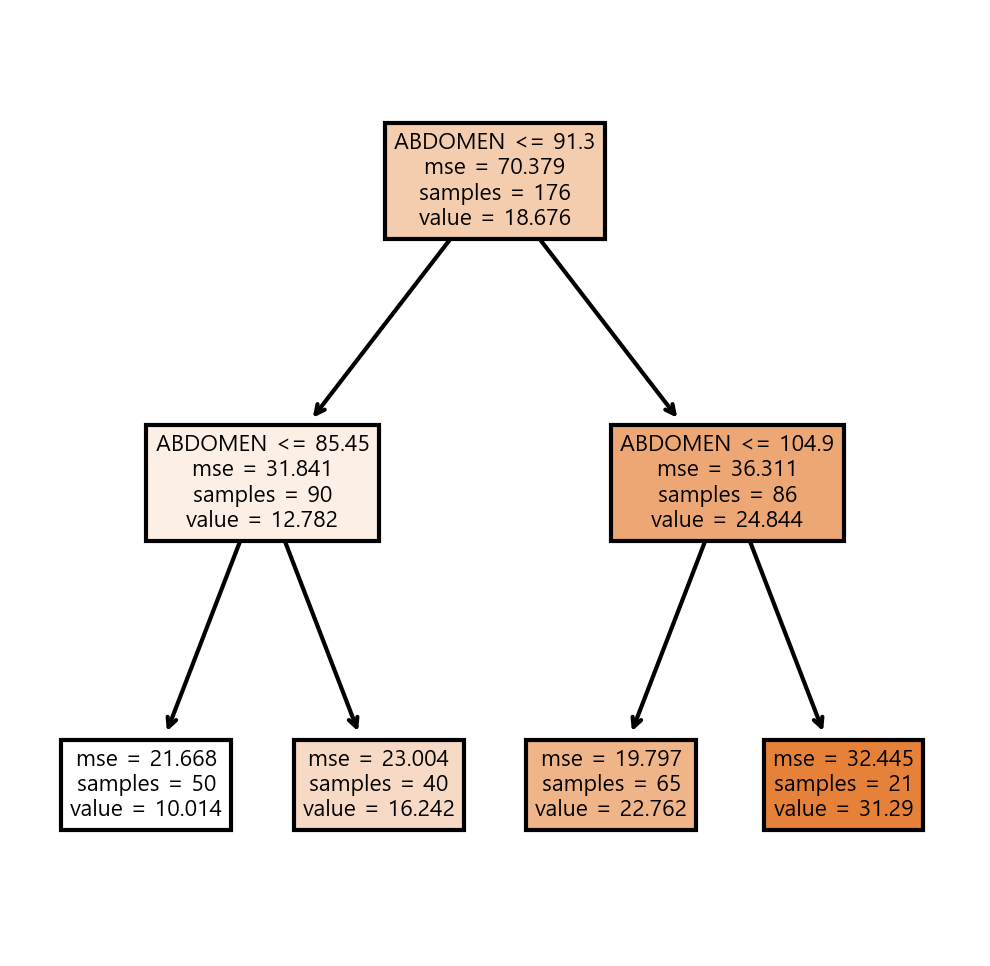

In [56]:
# 최대깊이 = 2 모델
tree_graph = DecisionTreeRegressor(random_state=1234, min_samples_leaf=8, min_samples_split=20, max_depth = 2 )
tree_graph.fit(df_train_x, df_train_y)
v_feature_name = df_train_x.columns
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4, 4), dpi=300)
plot_tree(tree_graph, feature_names = v_feature_name, filled = True);

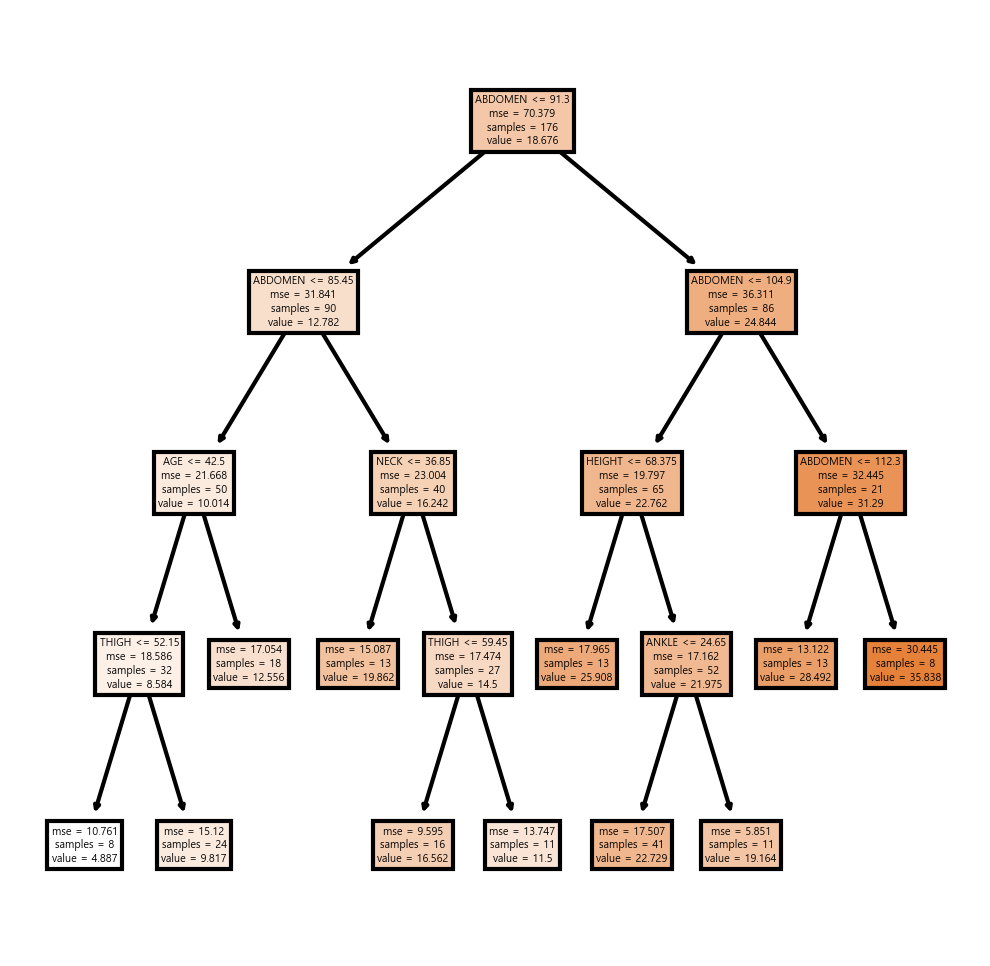

In [57]:
# 최대깊이 = 4 모델
tree_graph = DecisionTreeRegressor(random_state=1234, min_samples_leaf=8, min_samples_split=20, max_depth = 4 )
tree_graph.fit(df_train_x, df_train_y)
v_feature_name = df_train_x.columns
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4, 4), dpi=300)
plot_tree(tree_graph, feature_names = v_feature_name, filled = True);

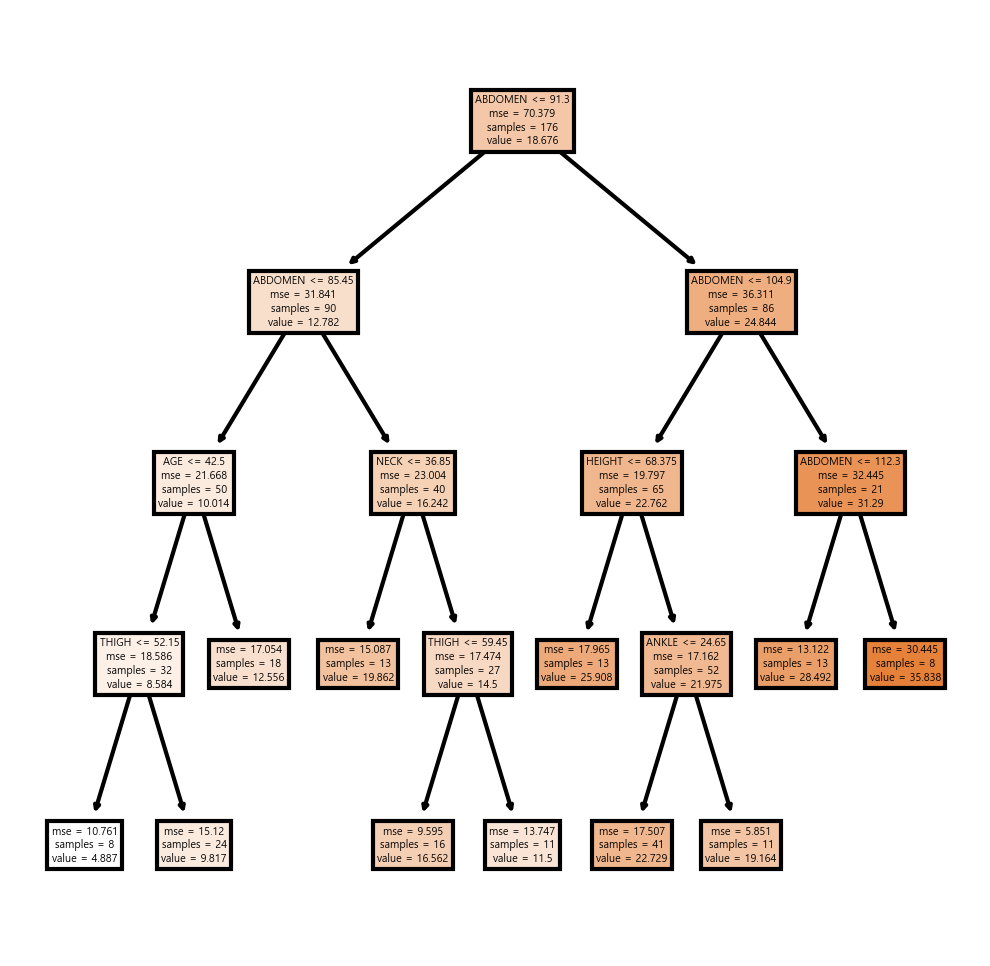

In [43]:
# 최종 모델
tree_final = DecisionTreeRegressor(min_samples_leaf = 8, min_samples_split = 20, max_depth = 4, random_state=1234, )
tree_final.fit(df_train_x, df_train_y)

export_graphviz(tree_final, out_file="tree_final.dot",
                feature_names = v_feature_name, impurity = True, filled = True)

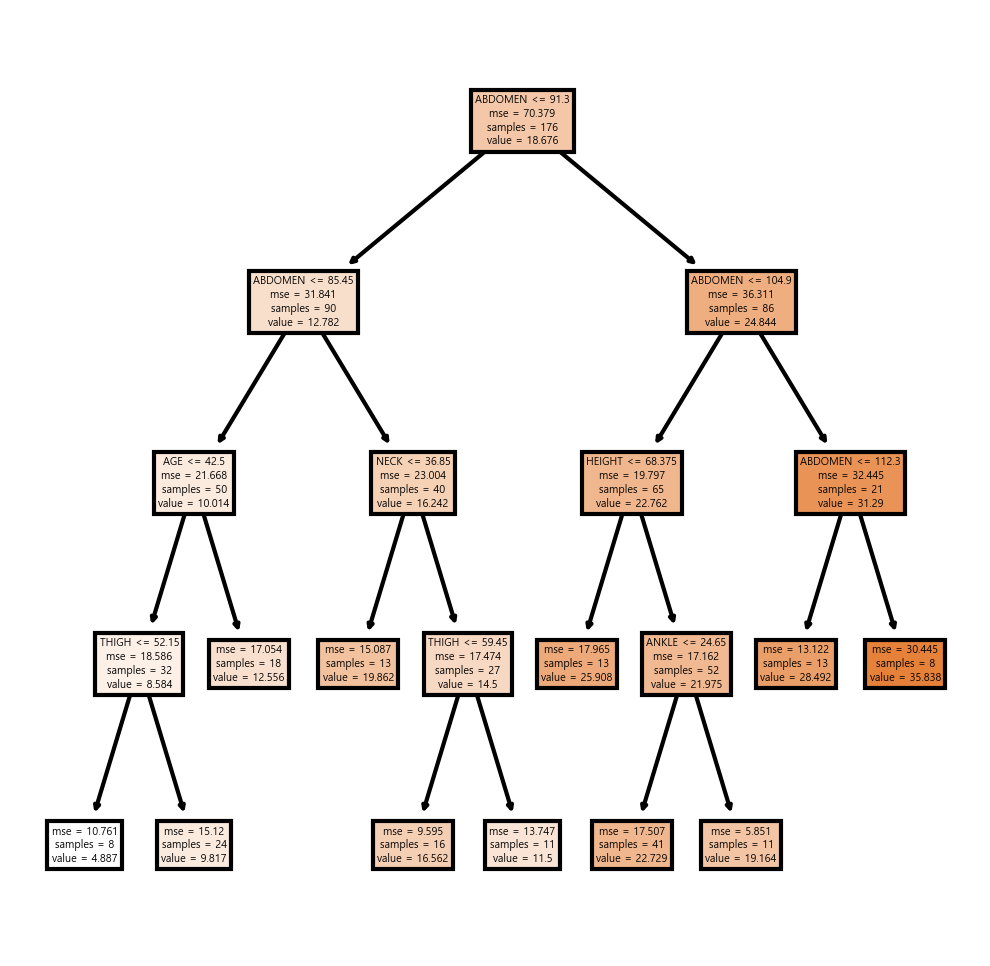

In [58]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4, 4), dpi=300)
plot_tree(tree_final, feature_names = v_feature_name, filled = True);

In [59]:
# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = tree_final.feature_importances_

# df_feature_importance의 테이블을 중요도별로 정렬
df_importance.sort_values("Importance", ascending=False, inplace = True)
df_importance.round(3)


,Feature,Importance
5,ABDOMEN,0.895
7,THIGH,0.032
3,NECK,0.026
0,AGE,0.019
2,HEIGHT,0.017
9,ANKLE,0.011
1,WEIGHT,0.000
4,CHEST,0.000
6,HIP,0.000
8,KNEE,0.000


Text(0, 0.5, '변수')

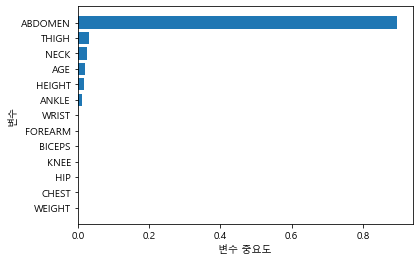

In [62]:
# 중요도가 높은 변수를 상위에 그림
df_importance.sort_values("Importance", ascending=True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")


In [63]:
# GridSearchCV를 이용한 최적 parameter 찾기
estimator = DecisionTreeRegressor()
# 구하고자 하는 parameter와 범위
param_grid = {"criterion": ["mse", "friedman_mse", "mae"], "max_features": ["auto", "sqrt", "log2"],
              "max_depth": para_depth, "min_samples_split": para_split,
              "min_samples_leaf": para_leaf}
# 설명력이 높은 최적 parameter 찾기
grid_dt = GridSearchCV(estimator, param_grid, scoring="r2", n_jobs = -1)
grid_dt.fit(df_train_x, df_train_y)

print("best estimator model: \n{}".format(grid_dt.best_estimator_))
print("\nbest parameter: \n{}".format(grid_dt.best_params_))
print("\nbest score: \n{}".format(grid_dt.best_score_.round(3)))


best estimator model: 
DecisionTreeRegressor(criterion='mae', max_depth=2, max_features='auto',
                      min_samples_leaf=18, min_samples_split=4)

best parameter: 
{'criterion': 'mae', 'max_depth': 2, 'max_features': 'auto', 'min_samples_leaf': 18, 'min_samples_split': 4}

best score: 
0.613


# 의사결정나무_ 실습 (당뇨병)

각 파라미터 값은 직접 지정해줘야함

In [122]:
df_raw = pd.read_csv("C:/Users/USER/Desktop/포스코 청년 아카데미_B4_김민경/데이터 분석1/분석자료/DIABETES.CSV")
df_raw.head()

,Y,AGE,GENDER,BMI,BP,CHOLESTEROL,LDL,HDL,TCH,LTG,GLUCOSE
0,151,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87
1,75,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69
2,141,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85
3,206,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89
4,135,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80


In [123]:
# 목표변수, 설명변수 데이터 지정
df_raw_y = df_raw['Y']
df_raw_x = df_raw.drop('Y', axis = 1, inplace = False)

In [124]:
# train, test 분리
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y,
                                                               test_size= 0.3, random_state=1234)
print('train data X size : {}'.format(df_train_x.shape))
print('train data Y size : {}'.format(df_train_y.shape))
print('test data X size : {}'.format(df_test_x.shape))
print('test data Y size : {}'.format(df_test_y.shape))

train data X size : (309, 10)
train data Y size : (309,)
test data X size : (133, 10)
test data Y size : (133,)


In [125]:
tree_uncustomized = DecisionTreeRegressor(random_state = 1234)
tree_uncustomized.fit(df_train_x, df_train_y)

# train 데이터 설명력
print('Score on training set : {:.3f}'.format(tree_uncustomized.score(df_train_x, df_train_y)))
# test 데이터 설명력
print('Score on test set : {:.3f}'.format(tree_uncustomized.score(df_test_x, df_test_y)))

Score on training set : 1.000
Score on test set : -0.143


In [69]:
tree_uncustomized

DecisionTreeRegressor(random_state=1234)

In [70]:
train_score =[]
test_score=[]

para_leaf = [n_leaf * 1 for n_leaf in range(1,20)]

for v_min_samples_leaf in para_leaf:
    tree = DecisionTreeRegressor(random_state = 1234
                                , min_samples_leaf = v_min_samples_leaf)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))
    
df_score_leaf = pd.DataFrame()
df_score_leaf['MinSamplesLeaf'] = para_leaf
df_score_leaf['TrainScore'] = train_score
df_score_leaf['TestScore'] = test_score

In [71]:
# 모델 설명력 확인
df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,1,1.000,-0.143
1,2,0.953,-0.111
2,3,0.878,0.039
3,4,0.836,0.083
4,5,0.773,0.062
5,6,0.730,0.042
6,7,0.707,0.107
7,8,0.669,0.109
8,9,0.649,0.144
9,10,0.614,0.203


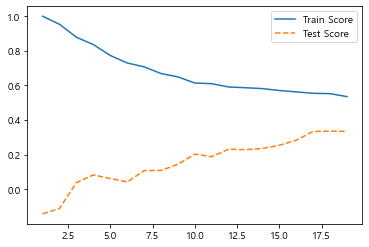

In [72]:
# 모델 설몀력 그래프 확인
plt.plot(para_leaf, train_score, linestyle = '-', label = 'Train Score')
plt.plot(para_leaf, test_score, linestyle = '--', label = 'Test Score')
plt.legend()

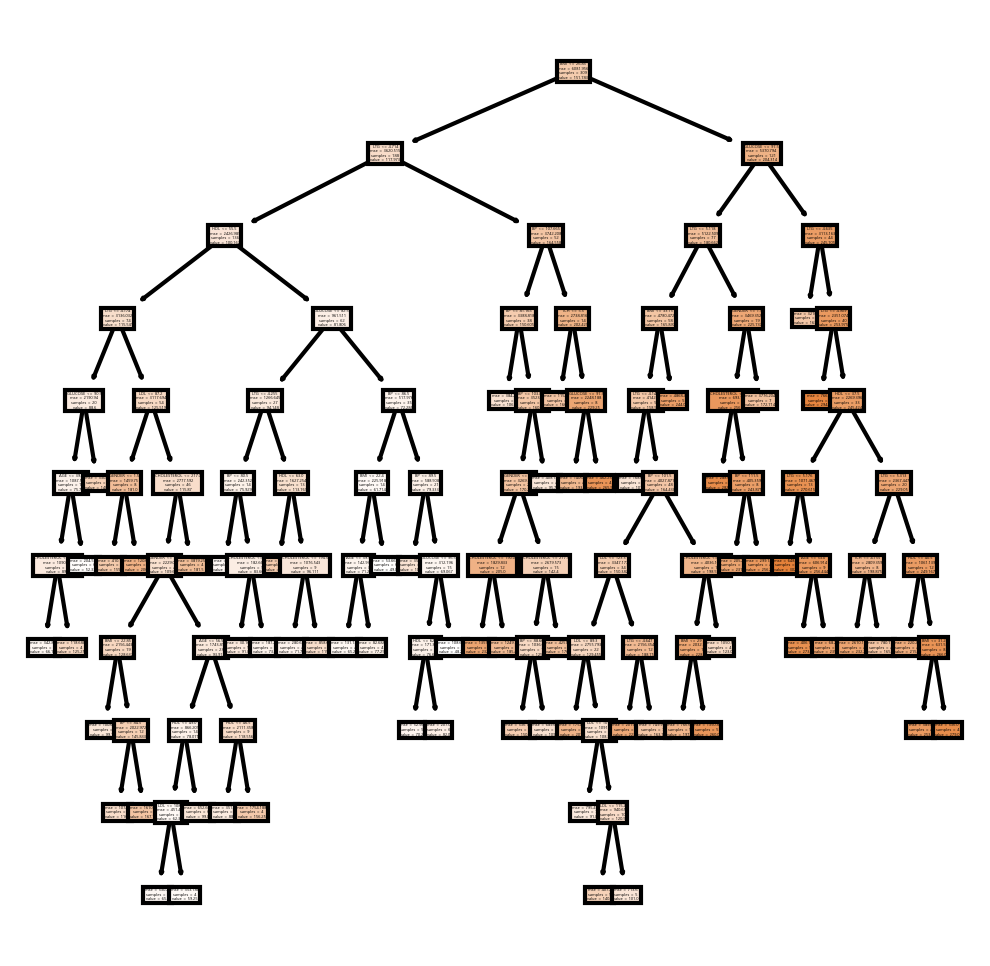

In [75]:
# 파라미터를 4, 12으로 지정
# 변수명 저장
v_feature_name = df_train_x.columns
# 노드의 최소 자료 수=4 모델
tree_graph = DecisionTreeRegressor(random_state=1234,  min_samples_leaf=4 )
tree_graph.fit(df_train_x, df_train_y)
v_feature_name = df_train_x.columns
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4, 4), dpi=300)
plot_tree(tree_graph, feature_names = v_feature_name, filled = True);

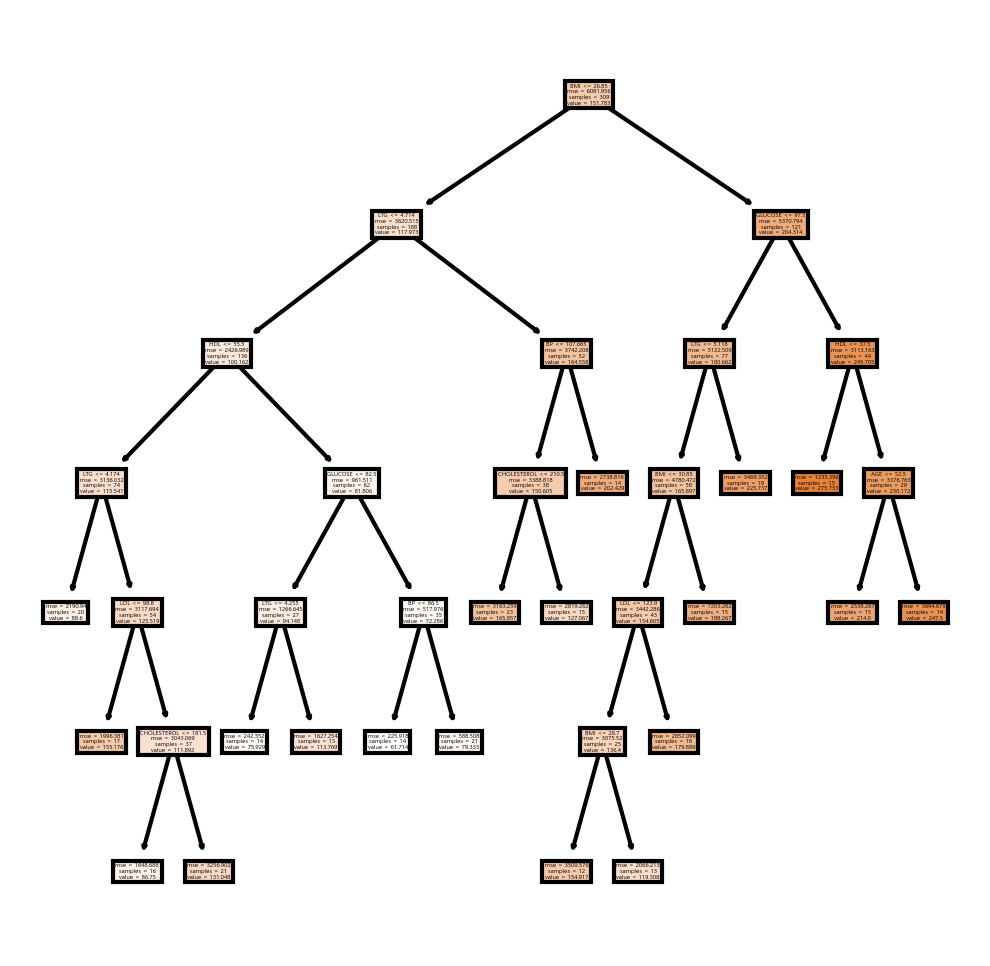

In [76]:
# 노드의 최소 자료 수=12 모델
tree_graph = DecisionTreeRegressor(random_state=1234,  min_samples_leaf=12 )
tree_graph.fit(df_train_x, df_train_y)
v_feature_name = df_train_x.columns
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4, 4), dpi=300)
plot_tree(tree_graph, feature_names = v_feature_name, filled = True);

In [85]:
train_score = [] 
test_score = []
# min_samples_split: 분리 노드의 최소 자료 수 
para_split = [n_split * 2 for n_split in range(2, 20)]

for v_min_samples_split in para_split:
    tree = DecisionTreeRegressor(random_state=1234, min_samples_leaf=4
                                 , min_samples_split=v_min_samples_split )
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))
# 결과 저장
df_score_split = pd.DataFrame()
df_score_split["MinSamplesSplit"] = para_split
df_score_split["TrainScore"] = train_score
df_score_split["TestScore"] = test_score
df_score_split.round(3)

,MinSamplesSplit,TrainScore,TestScore
0,4,0.836,0.083
1,6,0.836,0.083
2,8,0.836,0.083
3,10,0.811,0.079
4,12,0.797,0.088
5,14,0.771,0.150
6,16,0.737,0.191
7,18,0.732,0.202
8,20,0.710,0.221
9,22,0.694,0.259


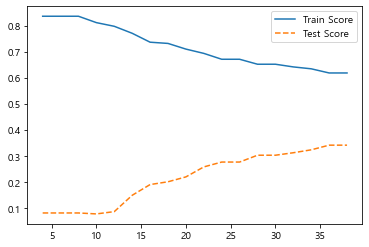

In [86]:
# 모델 설명력 그래프 확인
plt.plot(para_split, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_split, test_score, linestyle = "--", label = "Test Score")
plt.legend()

# 성능변화를 고려하여 20, 26 선택

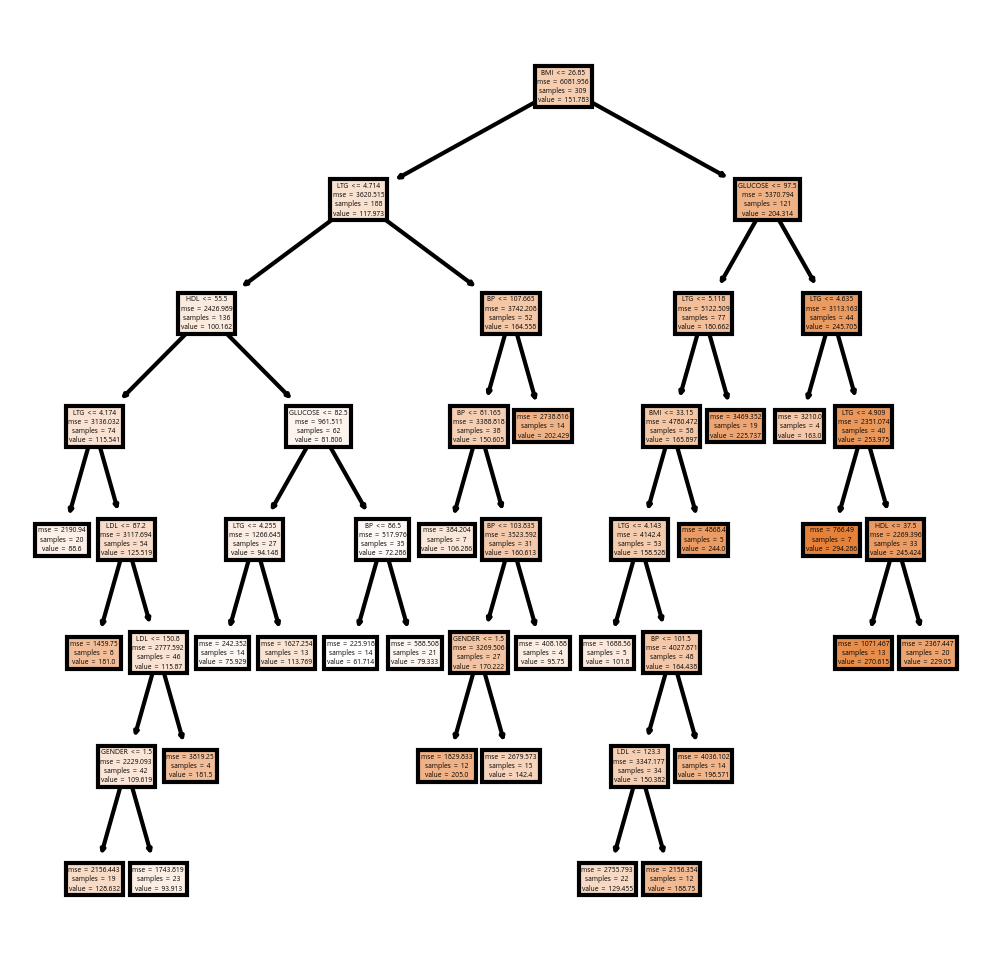

In [87]:
# 파라미터를 25, 30으로 지정
# 분리노드의 최소자료수 = 25 모델
tree_graph = DecisionTreeRegressor(random_state=1234, min_samples_leaf=4, min_samples_split=25 )
tree_graph.fit(df_train_x, df_train_y)
v_feature_name = df_train_x.columns
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4, 4), dpi=300)
plot_tree(tree_graph, feature_names = v_feature_name, filled = True);

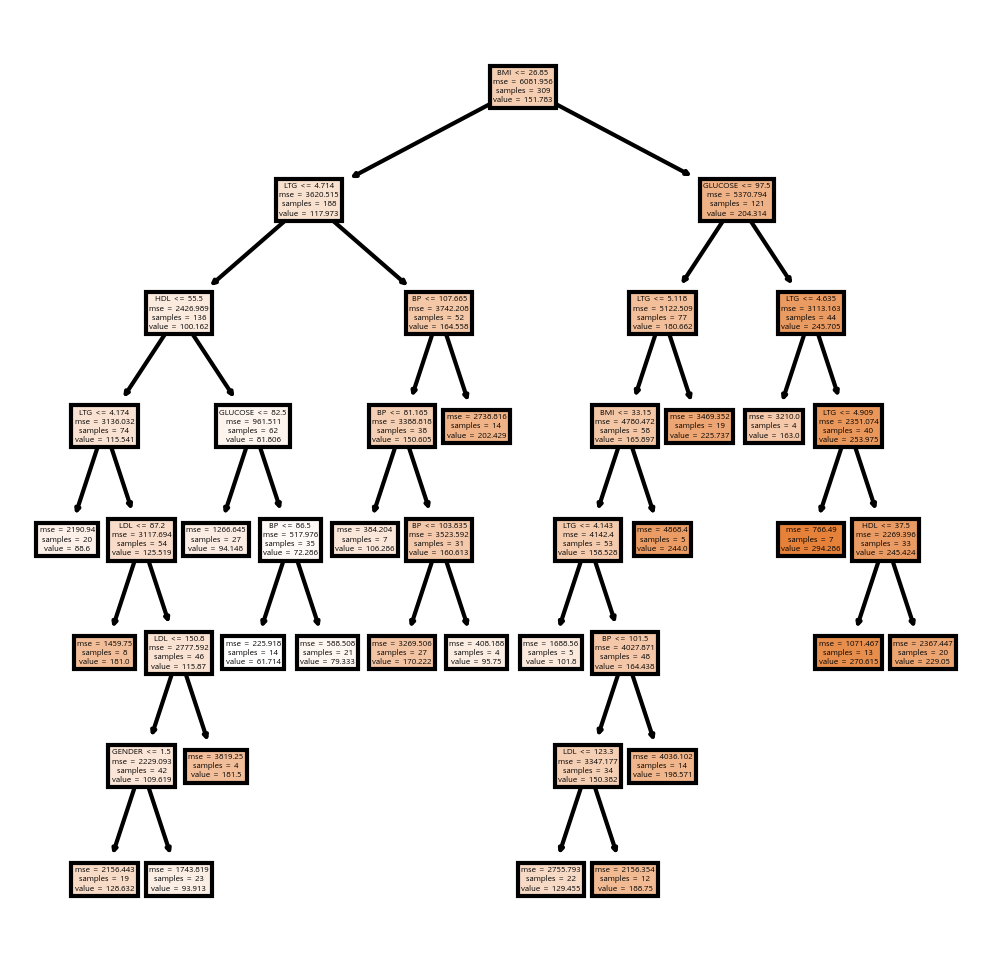

In [88]:
# 분리노드의 최소자료수 = 30 모델
tree_graph = DecisionTreeRegressor(random_state=1234, min_samples_leaf=4, min_samples_split=30 )
tree_graph.fit(df_train_x, df_train_y)
v_feature_name = df_train_x.columns
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4, 4), dpi=300)
plot_tree(tree_graph, feature_names = v_feature_name, filled = True);

In [89]:
train_score = []
test_score = []
# max_depth: 최대 깊이 변경
para_depth = [depth for depth in range(1, 11)]

for v_max_depth in para_depth:
    tree = DecisionTreeRegressor(random_state=1234, min_samples_leaf=4, min_samples_split=25
                                  , max_depth = v_max_depth)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_score_depth = pd.DataFrame()
df_score_depth["Depth"] = para_depth
df_score_depth["TrainScore"] = train_score
df_score_depth["TestScore"] = test_score
df_score_depth.round(3)

,Depth,TrainScore,TestScore
0,1,0.292,0.231
1,2,0.438,0.351
2,3,0.516,0.344
3,4,0.565,0.353
4,5,0.614,0.314
5,6,0.650,0.304
6,7,0.671,0.278
7,8,0.671,0.278
8,9,0.671,0.278
9,10,0.671,0.278


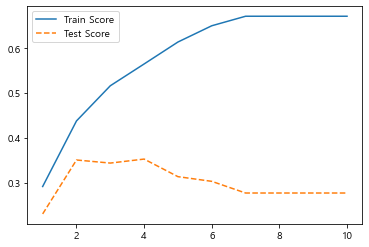

In [90]:
# 모델 설명력 그래프 확인
plt.plot(para_depth, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_depth, test_score, linestyle = "--", label = "Test Score")
plt.legend()


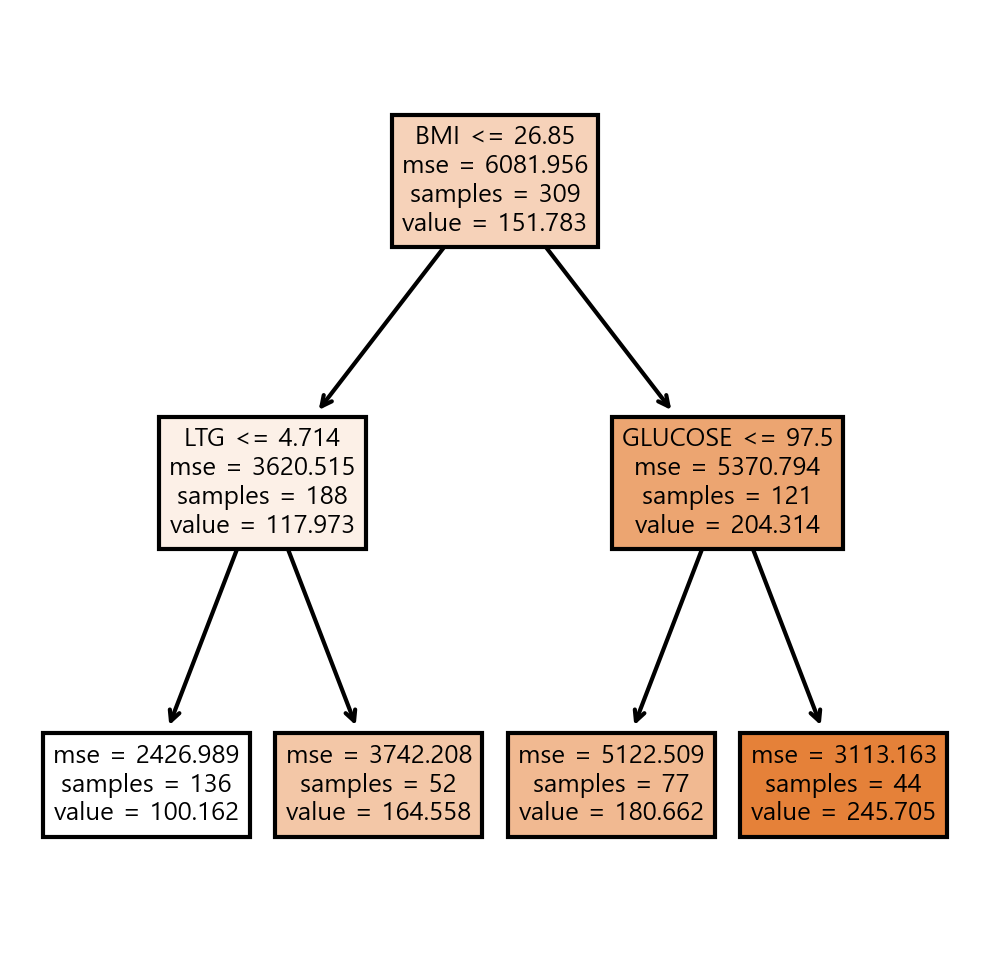

In [91]:
# 최대깊이 = 2 모델
tree_graph = DecisionTreeRegressor(random_state=1234, min_samples_leaf=4, min_samples_split=25, max_depth = 2 )
tree_graph.fit(df_train_x, df_train_y)
v_feature_name = df_train_x.columns
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4, 4), dpi=300)
plot_tree(tree_graph, feature_names = v_feature_name, filled = True);

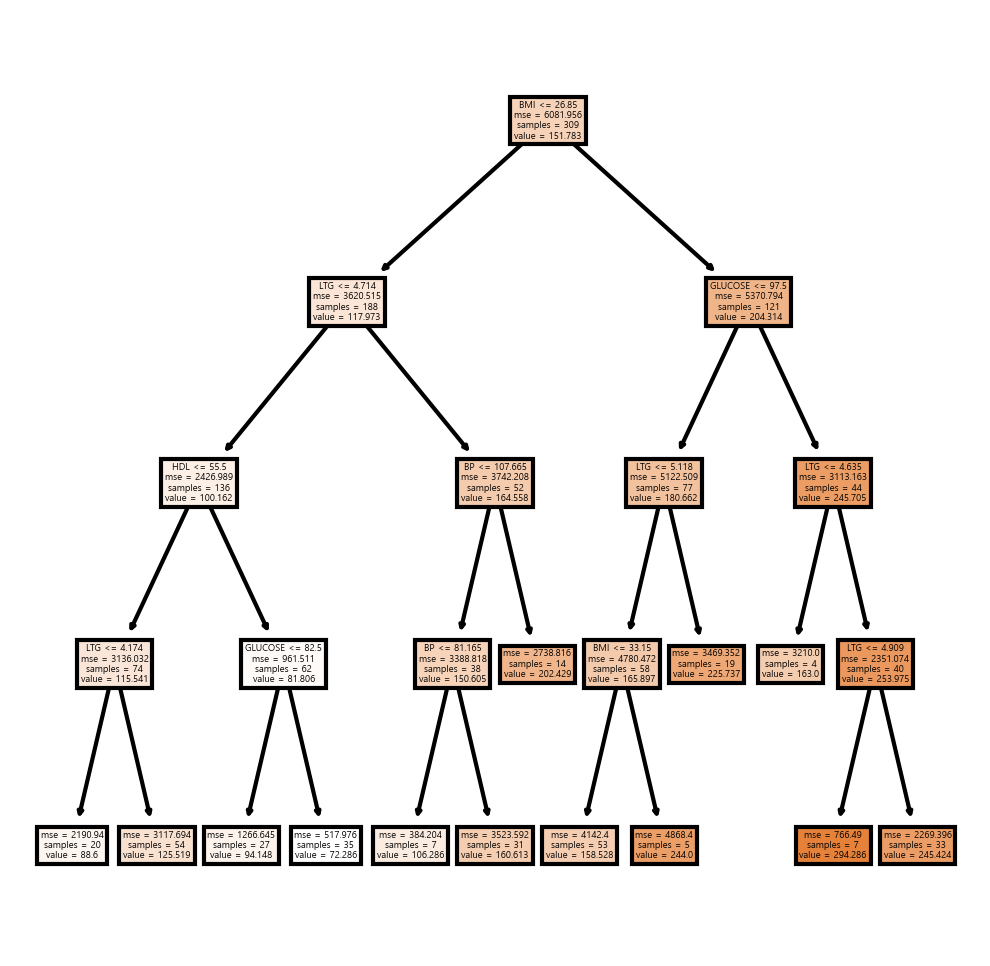

In [92]:
# 최대깊이 = 4 모델
tree_graph = DecisionTreeRegressor(random_state=1234, min_samples_leaf=4, min_samples_split=25, max_depth = 4 )
tree_graph.fit(df_train_x, df_train_y)
v_feature_name = df_train_x.columns
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4, 4), dpi=300)
plot_tree(tree_graph, feature_names = v_feature_name, filled = True);

In [97]:
# 최종 모델
tree_final = DecisionTreeRegressor(min_samples_leaf = 4, min_samples_split = 25, max_depth = 4, random_state=1234, )
tree_final.fit(df_train_x, df_train_y)

# export_graphviz(tree_final, out_file="tree_final.dot",
#                 feature_names = v_feature_name, impurity = True, filled = True)

DecisionTreeRegressor(max_depth=4, min_samples_leaf=4, min_samples_split=25,
                      random_state=1234)

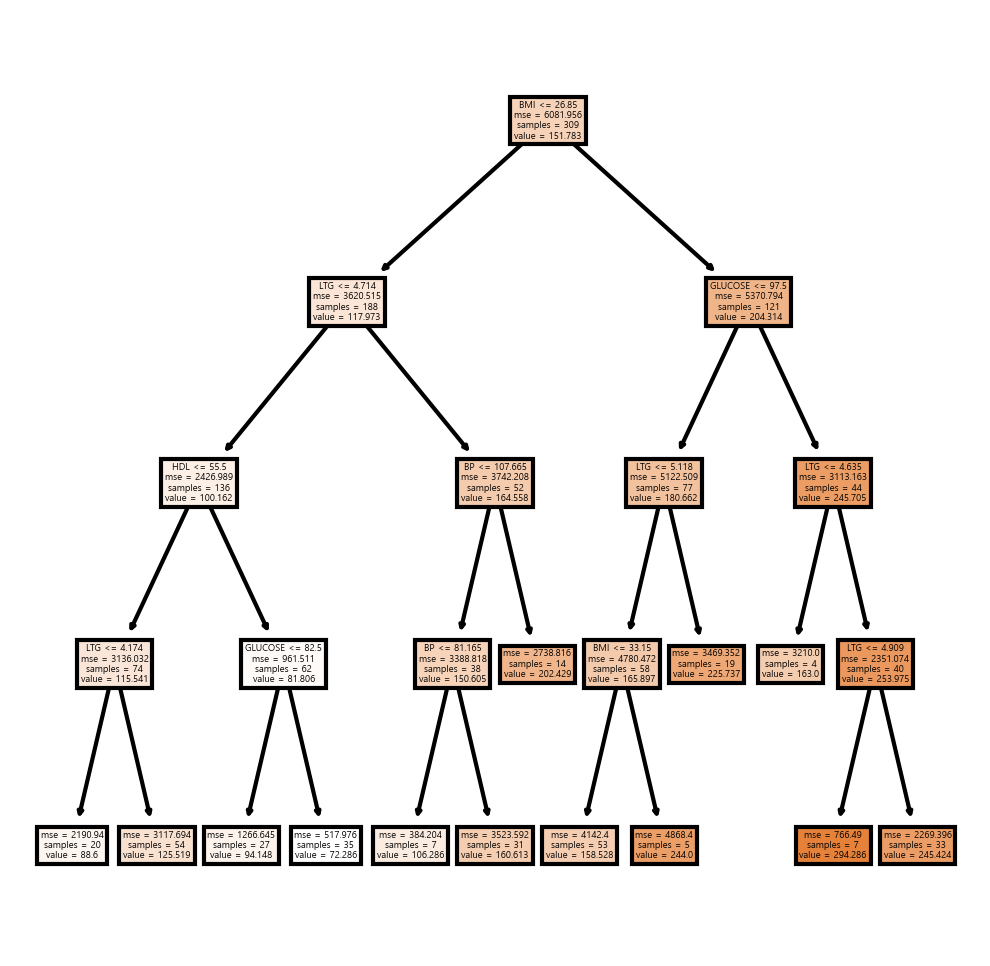

In [98]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4, 4), dpi=300)
plot_tree(tree_final, feature_names = v_feature_name, filled = True);

In [99]:
# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = tree_final.feature_importances_

# df_feature_importance의 테이블을 중요도별로 정렬
df_importance.sort_values("Importance", ascending=False, inplace = True)
df_importance.round(3)

,Feature,Importance
2,BMI,0.548
8,LTG,0.255
9,GLUCOSE,0.118
3,BP,0.042
6,HDL,0.036
0,AGE,0.000
1,GENDER,0.000
4,CHOLESTEROL,0.000
5,LDL,0.000
7,TCH,0.000


Text(0, 0.5, '변수')

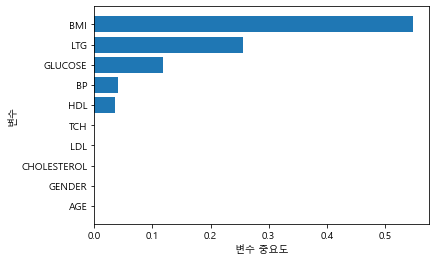

In [100]:
# 중요도가 높은 변수를 상위에 그림
df_importance.sort_values("Importance", ascending=True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

In [101]:
# GridSearchCV를 이용한 최적 parameter 찾기
estimator = DecisionTreeRegressor()
# 구하고자 하는 parameter와 범위
param_grid = {"criterion": ["mse", "friedman_mse", "mae"], "max_features": ["auto", "sqrt", "log2"],
              "max_depth": para_depth, "min_samples_split": para_split,
              "min_samples_leaf": para_leaf}
# 설명력이 높은 최적 parameter 찾기
grid_dt = GridSearchCV(estimator, param_grid, scoring="r2", n_jobs = -1)
grid_dt.fit(df_train_x, df_train_y)

print("best estimator model: \n{}".format(grid_dt.best_estimator_))
print("\nbest parameter: \n{}".format(grid_dt.best_params_))
print("\nbest score: \n{}".format(grid_dt.best_score_.round(3)))

best estimator model: 
DecisionTreeRegressor(max_depth=6, max_features='sqrt', min_samples_leaf=19,
                      min_samples_split=22)

best parameter: 
{'criterion': 'mse', 'max_depth': 6, 'max_features': 'sqrt', 'min_samples_leaf': 19, 'min_samples_split': 22}

best score: 
0.406
